In [2]:
import numpy as np
import torch
from matplotlib import pyplot as plt
from sbi.inference.base import infer
from sbi import utils as utils
from sbi import analysis as analysis
from torch.distributions import Normal

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-03-13 11:56:24.082095: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
from sbi_tools import TruncatedNormal, get_SNPE_posterior, SymmetricTruncatedNormal
from simulators import Simulator
from spectralcomponents import PowerLaw, GaussianEmissionLine
from sbi.inference import SNRE_B, SNLE, prepare_for_sbi, simulate_for_sbi

In [4]:
from sbi.neural_nets.embedding_nets import FCEmbedding, CNNEmbedding, PermutationInvariantEmbedding
from sbi_tools import BoxUniform



c1 = PowerLaw()
true_params = (0.5, 1)

prior = BoxUniform(low=torch.tensor([0.1, 0.1]), high=torch.tensor([1, 2]))
def simulate_simple(params):
    simulator =  Simulator(c1, 10000, pileup='channels')
    return simulator((params))

In [1]:
simulator, prior = prepare_for_sbi(simulate_simple, prior)

# Uncomment to simulate new data
# theta, x = simulate_for_sbi(simulator, proposal=prior, num_simulations=100000)
# np.save('theta.npy', theta)
# np.save('x.npy', x)

# Load data
theta = torch.Tensor(np.load('theta.npy'))
x = torch.Tensor(np.load('x.npy'))

NameError: name 'prepare_for_sbi' is not defined

In [6]:
from sbi.neural_nets.embedding_nets import FCEmbedding, CNNEmbedding, PermutationInvariantEmbedding
from sbi_tools import BoxUniform
from sbi.utils import posterior_nn
from sbi.inference import SNPE, prepare_for_sbi

simulator, prior = prepare_for_sbi(simulator, prior)
embedding_net = FCEmbedding(input_dim=10000, output_dim=5)
neural_posterior = posterior_nn(
model="maf", embedding_net=embedding_net, hidden_features=10, num_transforms=2)
inference = SNPE(prior=prior, density_estimator=neural_posterior)
density_estimator = inference.append_simulations(theta, x).train()
posterior = inference.build_posterior(density_estimator)

 Neural network successfully converged after 86 epochs.

Drawing 10000 posterior samples: 10984it [00:00, 45211.89it/s]                          


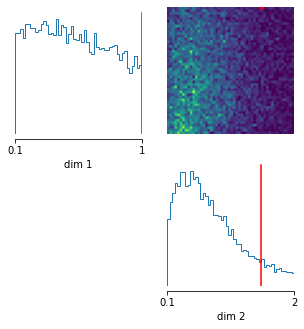

In [12]:
true_params = (1, 1.5)
true_x = simulate_simple(torch.tensor(true_params))
samples = posterior.sample((10000,), x=true_x)
fig, axes = analysis.pairplot(
    samples,
    limits=[[0.1, 1], [0.1, 2]],
    ticks=[[0.1, 1], [0.1, 2]],
    figsize=(5, 5),
    points=true_params,
    points_offdiag={"markersize": 6},
    points_colors="r",
)

In [9]:
import pickle
with open('posterior1.pkl', 'wb') as f:
    pickle.dump(posterior, f)